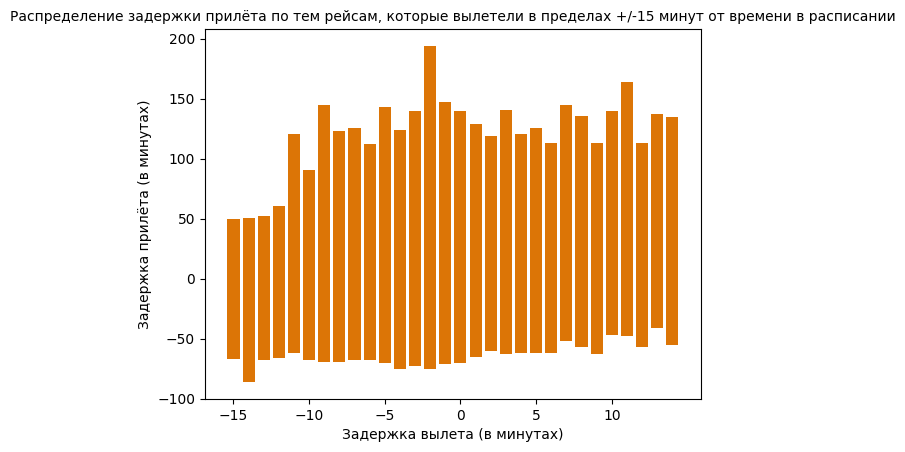

In [19]:
# Задача: построить гистограмму распределения задержки прилета по тем рейсам, которые вылетели в пределах +/-15 минут от времени в расписании; предположить, каким распределением может описываться эта гистограмма, оценить параметры этого распределения и нанести график плотности на график с гистограммой
import pandas as pd
import matplotlib.pyplot as plt

flights_df = pd.read_csv('flights_NY.csv').dropna(axis=0)

# Отфильтровал датасет, выбрав только те рейсы, которые вылетели в пределах +/-15 минут от времени в расписании
filtered_df = flights_df[(flights_df['dep_delay'] >= -15) & (flights_df['dep_delay'] < 15)]

# Создал датафрейм со столбцами задержки вылета и задержки прилёта
delay_df = filtered_df[['dep_delay', 'arr_delay']]

# Создал гистограмму
plt.bar(delay_df['dep_delay'], delay_df['arr_delay'], color='#dc7506')
plt.xlabel('Задержка вылета (в минутах)')
plt.ylabel('Задержка прилёта (в минутах)')
plt.xticks(range(-15, 15, 5))
plt.title('Распределение задержки прилёта по тем рейсам, которые вылетели в пределах +/-15 минут от времени в расписании', fontsize=10)
plt.show()

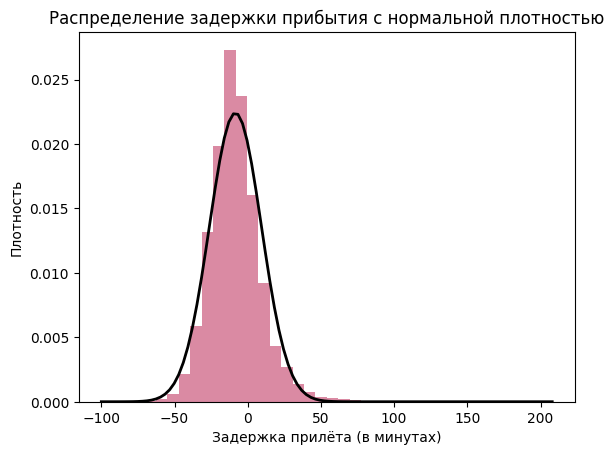

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

data = pd.read_csv('flights_NY.csv').dropna(axis=0)

filtered_data = data[(data['dep_delay'] >= -15) & (data['dep_delay'] < 15)]

arr_delay_data = filtered_data['arr_delay']
arr_delay_data = np.array(arr_delay_data)

# Я решил использовать нормальное распределение, потому что распределение задержек на гистограмме выглядит симметричным, что является характерной чертой нормального распределения. Кроме того, многие ошибки и отклонения в измерениях округляются нормальным распределением
mean, std = norm.fit(arr_delay_data)

# Создал саму гистограмму
plt.hist(arr_delay_data, bins=int(180/5), density=True, alpha=0.5, color='#b71648')

# Создал график плотности
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean, std)
plt.plot(x, p, 'k', linewidth=2)

plt.xlabel('Задержка прилёта (в минутах)')
plt.ylabel('Плотность')
plt.title('Распределение задержки прибытия с нормальной плотностью')
plt.show()